In [1]:
from calibrationFunctions import openFiles, calculateForce, calculateTetherExtension, findTetheredBeads
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folderPath = r"C:\Users\Perkins Lab\Desktop\Caleb Maddry\MT Data Analysis\Magnetic-Tweezers\Data\December\19\calebMT"

dataFrame = openFiles(folderPath, numRef=3, numExp=1, fps=400)

lowForce = []

for index in dataFrame.itertuples():
    if dataFrame['linearMotor'][index[0]] <= 15: lowForce = lowForce + [index[0]]
    if index[0] % 50000 == 0: print("Finding the low force points") 

Using: C:\Users\Perkins Lab\Desktop\Caleb Maddry\MT Data Analysis\Magnetic-Tweezers\Data\December\19\calebMT
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points


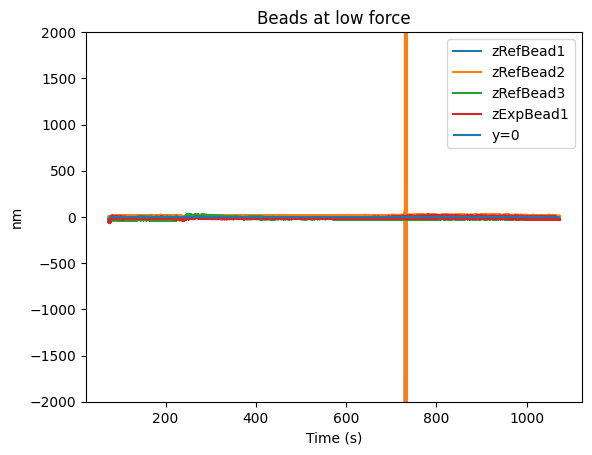

For ExpBead1:
	The low force x-variance is: 3676.4944564906473
	The low force y-variance is: 14890.584438095284
	The low force z-variance is: 4102.269700615916


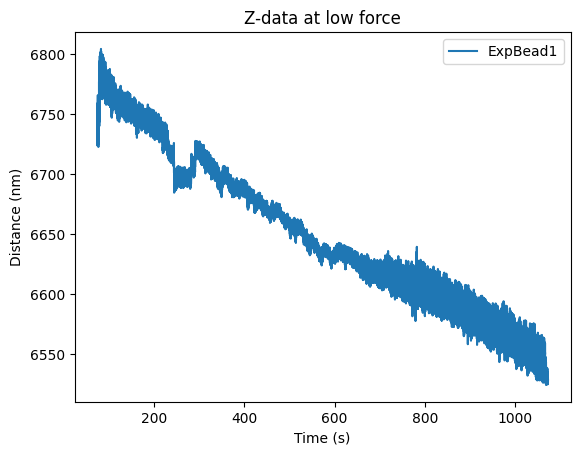

The glass position is:  -65.37799999999994


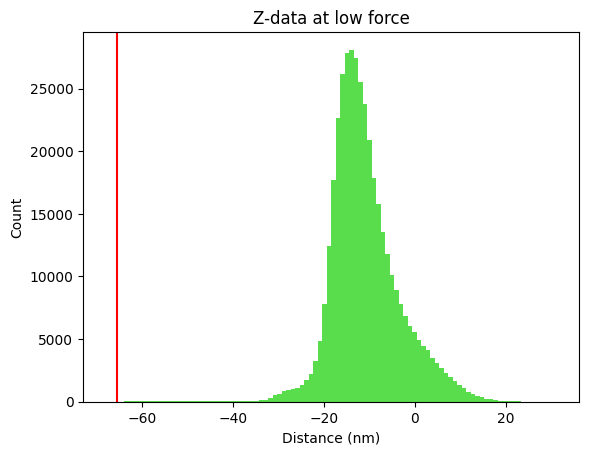

In [3]:
lowForceIdx = [min(lowForce), max(lowForce)]

tetherBeads = findTetheredBeads(dataFrame, lowForceIdx); 
dataFrame = calculateTetherExtension(dataFrame, tetherBeads, lowForceIdx); 

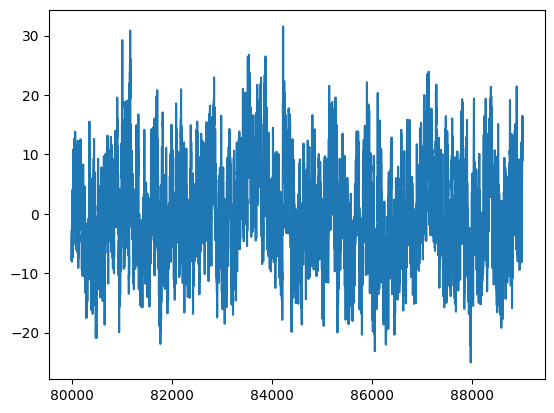

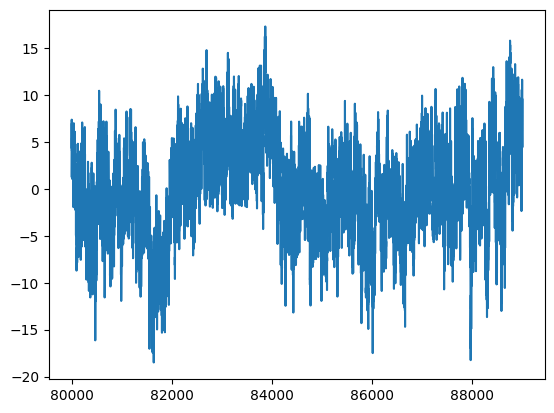

In [ ]:
xData1 = dataFrame["xRefBead3"] - dataFrame["xExpBead1"]
xData2 = dataFrame["xRefBead1"] - dataFrame["xExpBead1"]

yData1 = dataFrame["yRefBead3"] - dataFrame["yExpBead1"]
yData2 = dataFrame["yRefBead1"] - dataFrame["yExpBead1"]

zData1 = dataFrame["zRefBead3"] - dataFrame["zExpBead1"]
zData2 = dataFrame["zRefBead1"] - dataFrame["zExpBead1"]

zMotor = dataFrame["linearMotor"] 

highForceStart = 0; 
highForceEnd = 7400; 

medForceStart = 11000
medForceEnd = 27000

lowForceStart = 80000
lowForceEnd = 89000

plt.plot(zData1[lowForceStart:lowForceEnd] - np.mean(zData1[lowForceStart:lowForceEnd]))
plt.show()

plt.plot(zData2[lowForceStart:lowForceEnd] - np.mean(zData2[lowForceStart:lowForceEnd]))
plt.show()




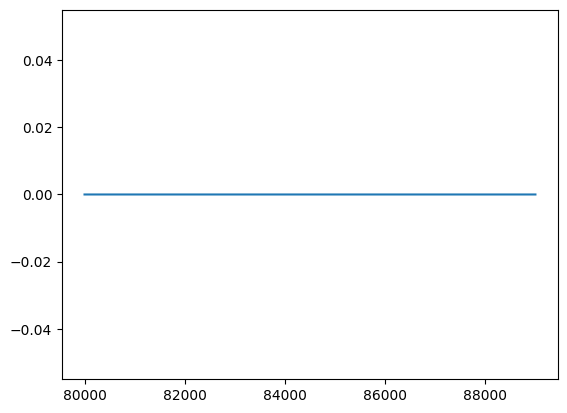

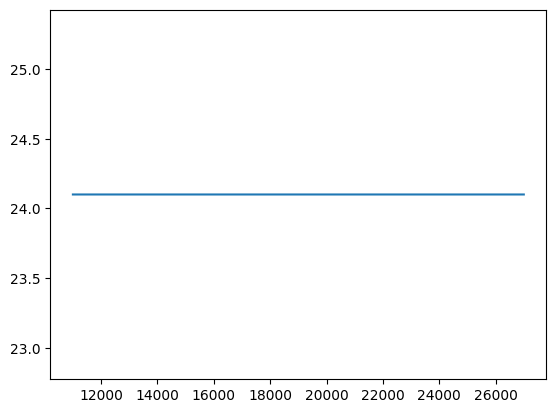

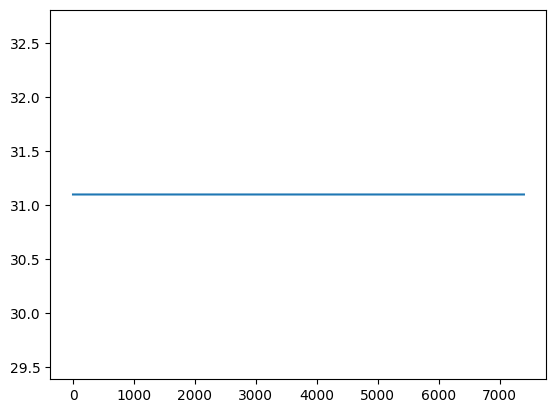

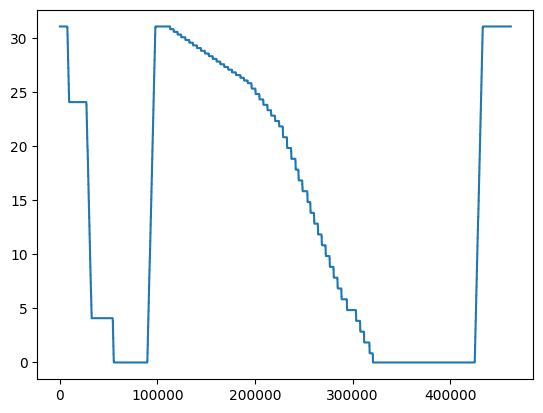

In [34]:
plt.plot(zMotor[lowForceStart:lowForceEnd])
plt.show()

plt.plot(zMotor[medForceStart:medForceEnd])
plt.show()

plt.plot(zMotor[highForceStart:highForceEnd])
plt.show()

plt.show()
plt.plot(zMotor)